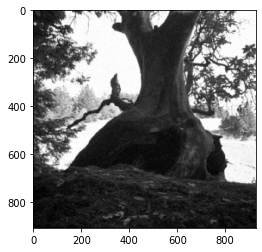

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks

Tree_00032   = '..\hdr-bilder\Tree\Tree_00032.png'
Balls_00032  = '..\hdr-bilder\Balls\Balls_00032.png'

def glatting(fil):
    image = imageio.imread(fil)
    image = np.sum(image.astype(float),2)/(3*255)             #gråtone
    image = image + .05 * np.random.randn(* np.shape(image))  #legg på tilfeldig støy
    
    image[image < 0] = 0                                      #klipp til lovlige verdier
    image[image > 1] = 1
    
    los = eks.eksplisitt(image, n = 8)
    image[:, 0] = image[:, 1]      # Neumann randbetingelse
    image[:, -1] = image[:, -2]    #
    image[0, :] = image[1, :]      #
    image[-1, :] = image[-2 , :]   #

    plt.imshow(image,plt.cm.gray) 


glatting(Tree_00032)

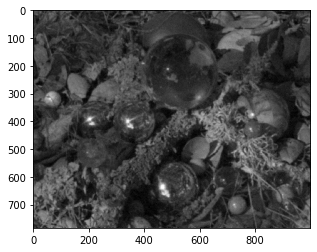

In [80]:
glatting(Balls_00032)